In [2]:
import pandas as pd
import numpy as np
import sys

sys.path.append('./modules')
from visual import *


In [6]:
data = pd.read_csv('./../databases/csv-data/basic_data.csv')

page_df = PageData(data).cleaned
activity_df = ActivityData(page_df).cleaned

In [3]:
activity_df

,expert article,discuss board,group chat,speak to team,find local service,personal story,apps and tools,skill up,volunteer,news,blog,case study,research
000708d176f8010cb95adfa271ad797d,5,0,0,0,0,2,0,0,0,0,0,0,0
001291be71d38604bc02f7c469b80704,2,0,0,0,0,3,0,0,0,0,0,0,0
00310de616cf03e7740b739ead30aed2,0,0,0,2,0,6,0,0,0,0,0,0,0
00328efeb249f607b41564c486a73322,0,0,0,1,0,3,0,0,0,0,0,0,0
003eb8138953601befd26174f9eab5b5,2,0,0,0,0,3,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffd1a1be6fe774217f46a073bdb70a4f,1,0,0,0,0,1,0,0,0,0,0,0,0
ffd5f1f34196586d7d68cd18b0879143,0,0,0,0,0,4,0,0,0,0,0,0,0
ffe0c505101202f29745211fdb7a41c0,0,0,0,0,0,2,1,0,0,0,0,0,0
ffe0ebe625dc3376651625a1319a48f2,0,0,0,2,0,4,0,0,0,0,0,0,0


In [6]:
X = activity_df

Figure saved, tsne


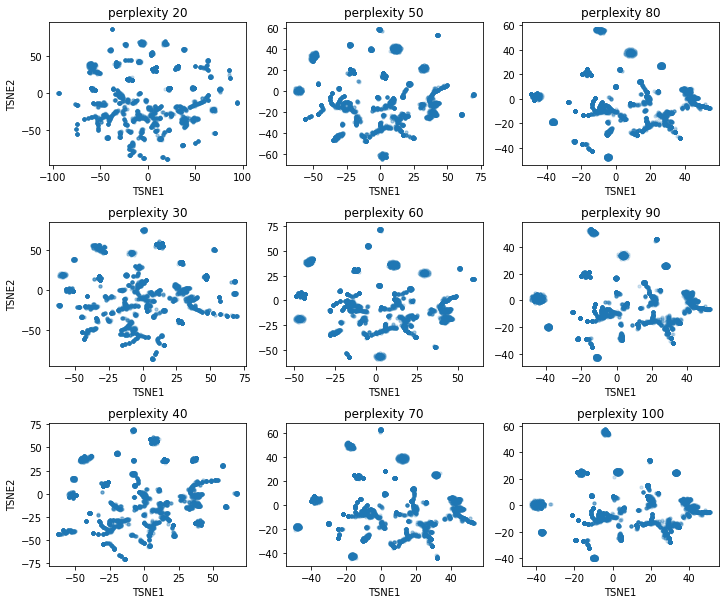

In [5]:
plot_tsne(X)
save_fig('tsne')

In [7]:
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)
    

tsne = TSNE(n_components=2, perplexity=80, random_state=214)
X_embeded = tsne.fit_transform(X_scaled)
tsne_results = pd.DataFrame(X_embeded, index=X_scaled.index)

Figure saved, dbscan


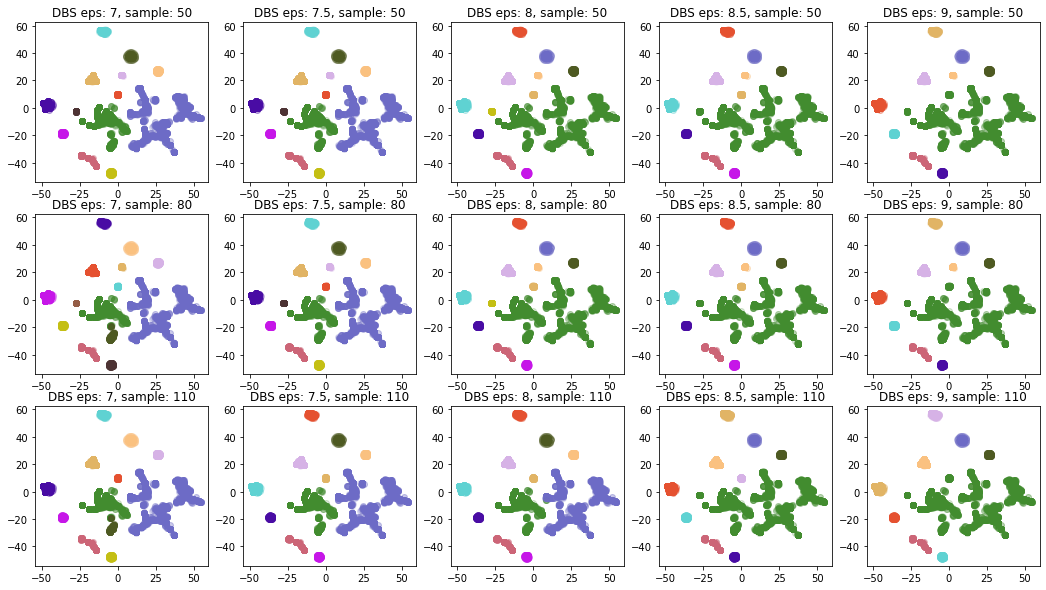

In [8]:
plot_dbscan(tsne_results)
save_fig('dbscan')

In [9]:
clusterer = DBSCAN(eps=8.5, min_samples=80).fit(tsne_results)
tsne_df = tsne_results.copy()
tsne_df.insert(0, 'cluster', clusterer.labels_)

In [10]:
test_df = pd.concat([tsne_df, activity_df], axis=1)
test_df.groupby('cluster')[list(activity_df.columns)].size()

cluster
0      250
1     3451
2      282
3      213
4       89
5      629
6      115
7      209
8      441
9      213
10     214
dtype: int64

In [11]:
user_group = pd.DataFrame()
user_group['uid'] = activity_df.index.tolist()
user_group['group']= tsne_df['cluster'].values
user_group['group'].replace({0: 'dbscan_0', 1: 'dbscan_1',
                            2: 'dbscan_2', 3: 'dbscan_3',
                            4: 'dbscan_4', 5: 'dbscan_5',
                            6: 'dbscan_6', 7: 'dbscan_7',
                            8: 'dbscan_8'}, inplace=True)

test_df.groupby('cluster')[list(activity_df.columns)].mean()

,expert article,discuss board,group chat,speak to team,find local service,personal story,apps and tools,skill up,volunteer,news,blog,case study,research
cluster,,,,,,,,,,,,,
0,3.600000,0.000000,0.000000,0.000000,0.0,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,1.770791,0.310635,0.282817,0.636627,0.0,8.765865,0.135613,0.042596,0.491162,0.008693,0.008693,0.0,0.010142
2,0.000000,0.000000,0.000000,0.000000,0.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,2.000000,0.000000,0.000000,0.000000,0.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,0.022472,0.000000,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
5,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.0,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
7,3.253589,0.148325,0.468900,1.555024,1.0,16.009569,0.722488,0.100478,0.521531,0.043062,0.019139,0.0,0.009569
8,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
